In [1]:
import pandas as pd
from scipy import stats
import numpy as np

In [14]:
# Loading the data
data = pd.read_csv('FormResponses.csv', header=0)

In [29]:
# Correcting column names by stripping extra spaces
data.columns = data.columns.str.strip()

In [34]:
# Converting categorical responses to numerical codes
data['Engagement'] = data['Did you find the gamified quiz more engaging compared to a traditional quiz?'].map({
    'Yes, much more engaging': 3,
    'Slightly more engaging': 2,
    'About the same': 1,
    'Less engaging': 0
})

In [35]:
data['Semester'] = data['Which semester are you currently enrolled in?'].map({
    'BS Semester 3': 1,
    'BS Semester 5': 2,
    'MS Semester 1': 3
})

In [42]:
# Replacing missing values in the "Semester" column with the mode
mode_semester = data['Semester'].mode()[0] 
data['Semester'] = data['Semester'].fillna(mode_semester)

In [43]:
# Groupping the data by 'Semester' and collect engagement scores for each group
engagement_groups = [data[data['Semester'] == semester]['Engagement'] for semester in data['Semester'].unique()]

# Kruskal-Wallis H Test for Engagement Scores
kruskal_stat_engagement, p_value_engagement = stats.kruskal(*engagement_groups)

print("Kruskal-Wallis H Test for Engagement Scores by Semester:")
print("Test Statistic:", kruskal_stat_engagement)
print("P-value:", p_value_engagement)

if p_value_engagement < 0.05:
    print("Reject the null hypothesis: There is a significant difference in engagement scores across semesters.")
else:
    print("Fail to reject the null hypothesis: No significant difference in engagement scores across semesters.")


Kruskal-Wallis H Test for Engagement Scores by Semester:
Test Statistic: 2.4668394055224967
P-value: 0.2912947310876786
Fail to reject the null hypothesis: No significant difference in engagement scores across semesters.


In [26]:
data['Focus'] = data['How much did the timer feature enhance your focus during the quiz?'].map({
    'A lot': 3,
    'Somewhat': 2,
    'Not much': 1,
    'Not at all': 0
})

In [45]:
# Mapping responses to numerical values
score_update_mapping = {
    'Yes, I loved it': 3,
    'It was okay': 2,
    'No, I didn’t like it': 1
}
data['Score_Enjoyment'] = data['Did you enjoy seeing your score update in real-time after each question?'].map(score_update_mapping)

overall_fun_mapping = {
    'Excellent': 4,
    'Good': 3,
    'Average': 2,
    'Poor': 1
}
data['Overall_Fun'] = data['How would you rate the overall fun and enjoyment level of the quiz?'].map(overall_fun_mapping)

In [46]:
# Non-parametric correlation analysis using Spearman's rank correlation
correlation, p_value = stats.spearmanr(data['Score_Enjoyment'].dropna(), data['Overall_Fun'].dropna())
print(f"Spearman correlation coefficient: {correlation}, P-value: {p_value}")

Spearman correlation coefficient: 0.4072538932447272, P-value: 1.7826032185820268e-05


In [76]:
if p_value_engagement < 0.05:
    print("Reject the null hypothesis: There is not a correlation between real time score update enjoyement and overall fun.")
else:
    print("Fail to reject the null hypothesis: There is a correlation between real time score update enjoyement and overall fun.")

Fail to reject the null hypothesis: There is a correlation between real time score update enjoyement and overall fun.


In [48]:
# Calculating confidence interval for Spearman correlation
n = len(data[['Score_Enjoyment', 'Overall_Fun']].dropna())
z = np.arctanh(correlation)  # Fisher transformation
se = 1 / np.sqrt(n - 3)  # Standard error
z_critical = stats.norm.ppf(0.975)  # 95% confidence interval
ci_lower = np.tanh(z - z_critical * se)
ci_upper = np.tanh(z + z_critical * se)

In [49]:
print(f"95% Confidence interval for the Spearman correlation: ({ci_lower}, {ci_upper})")

95% Confidence interval for the Spearman correlation: (0.23293532229988292, 0.5562167563328138)


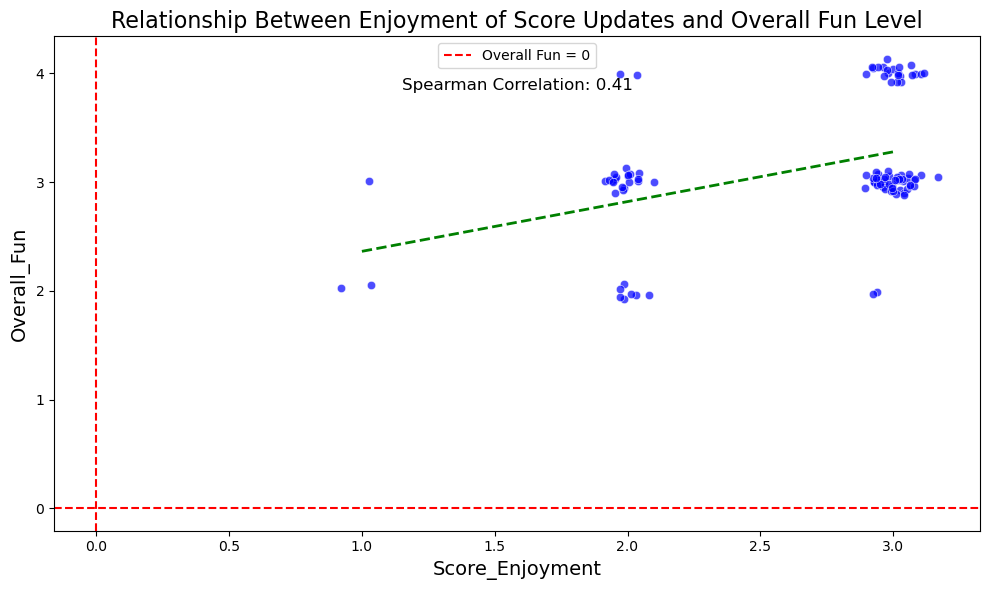

In [47]:
# Creating a scatter plot 
plt.figure(figsize=(10, 6))

# Adding jitter (random noise) to the data to ensure even repeated points are visible
jitter_strength = 0.05  

# Adding jitter to the data to avoid overlapping points
x_jitter = data['Score_Enjoyment'] + np.random.normal(0, jitter_strength, size=len(data))
y_jitter = data['Overall_Fun'] + np.random.normal(0, jitter_strength, size=len(data))

# Basic scatter plot with jittered data
sns.scatterplot(x=x_jitter, 
                y=y_jitter, 
                color='blue', 
                alpha=0.7)  # 'alpha' controls transparency

# Adding a title
plt.title('Relationship Between Enjoyment of Score Updates and Overall Fun Level', fontsize=16)

# Adding axis labels
plt.xlabel('Enjoyment of Score Updates', fontsize=14)
plt.ylabel('Overall Fun Level', fontsize=14)

# Adding horizontal and vertical lines with annotations
plt.axhline(y=0, color='r', linestyle='--', label='Overall Fun = 0')
plt.axvline(x=0, color='r', linestyle='--')
plt.legend()

# Adding trend line (for correlation)
sns.regplot(x=data['Score_Enjoyment'], 
            y=data['Overall_Fun'], 
            scatter=False, 
            color='green', 
            line_kws={"color": "green", "lw": 2, "ls": "--"}, 
            ci=None)  

# Displaying the Spearman correlation coefficient
spearman_corr = data[['Score_Enjoyment', 'Overall_Fun']].corr(method='spearman').iloc[0, 1]
plt.text(0.5, 0.9, f'Spearman Correlation: {spearman_corr:.2f}', ha='center', va='center', fontsize=12, transform=plt.gca().transAxes)

# Removing extra white space
plt.tight_layout()

# Saving and displaying the plot
plt.savefig('enhanced_correlation_enjoyment_fun.png')  # Save the figure
plt.show()


In [50]:
# Mapping responses to numerical values
score_update_mapping = {
    'Yes, I loved it': 3,
    'It was okay': 2,
    'No, I didn’t like it': 1
}
motivation_mapping = {
    'Yes, strongly motivated me': 3,
    'Somewhat motivated me': 2,
    'Did not motivate me': 1
}

In [51]:
data['score_update_enjoyment'] = data['Did you enjoy seeing your score update in real-time after each question?'].map(score_update_mapping)
data['motivation_score'] = data['Did the scores for each question motivate you to keep trying your best?'].map(motivation_mapping)

In [52]:
# Non-parametric correlation analysis using Spearman's rank correlation
correlation, p_value = stats.spearmanr(data['score_update_enjoyment'].dropna(), data['motivation_score'].dropna())
print(f"Spearman correlation coefficient: {correlation}, P-value: {p_value}")

Spearman correlation coefficient: 0.45486621242896674, P-value: 1.229014794208757e-06


In [77]:
if p_value_engagement < 0.05:
    print("Reject the null hypothesis: There is not a correlation between real time score update and motivation to perform better.")
else:
    print("Reject the null hypothesis: There is a correlation between real time score update and motivation to perform better.")

Reject the null hypothesis: There is a correlation between real time score update and motivation to perform better.


In [53]:
# Calculating confidence interval for Spearman correlation
n = len(data[['score_update_enjoyment', 'motivation_score']].dropna())
z = np.arctanh(correlation)  # Fisher transformation
se = 1 / np.sqrt(n - 3)  # Standard error
z_critical = stats.norm.ppf(0.975)  # 95% confidence interval
ci_lower = np.tanh(z - z_critical * se)
ci_upper = np.tanh(z + z_critical * se)
print(f"95% Confidence interval for the Spearman correlation: ({ci_lower}, {ci_upper})")

95% Confidence interval for the Spearman correlation: (0.28746002497251155, 0.5953046344291838)


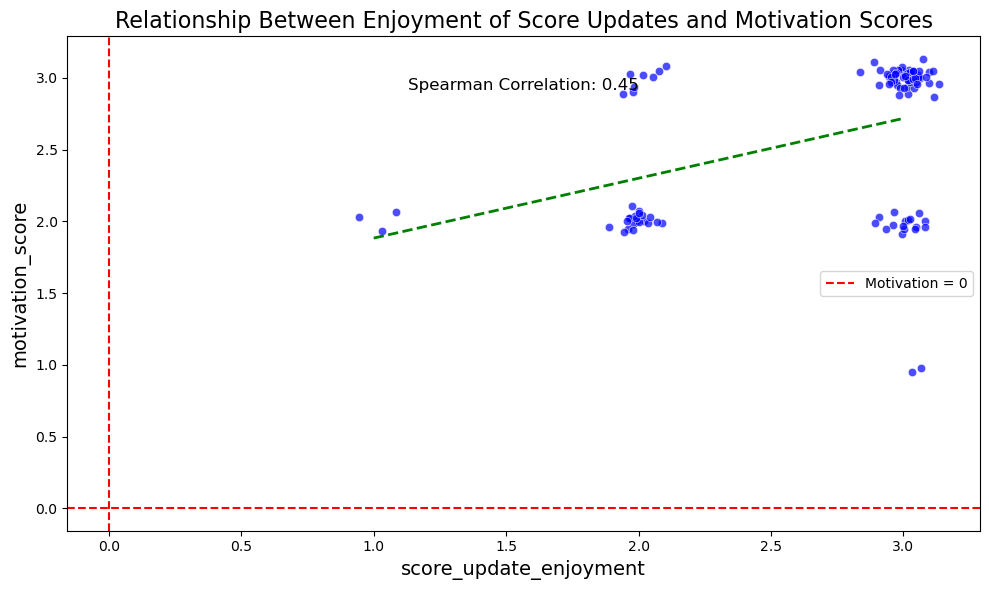

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Creating a scatter plot 
plt.figure(figsize=(10, 6))

# Adding jitter (random noise) to the data to ensure even repeated points are visible
jitter_strength = 0.05  

# Adding jitter to the data to avoid overlapping points
x_jitter = data['score_update_enjoyment'] + np.random.normal(0, jitter_strength, size=len(data))
y_jitter = data['motivation_score'] + np.random.normal(0, jitter_strength, size=len(data))

# Basic scatter plot with jittered data
sns.scatterplot(x=x_jitter, 
                y=y_jitter, 
                color='blue', 
                alpha=0.7)  # 'alpha' controls transparency

# Adding a title
plt.title('Relationship Between Enjoyment of Score Updates and Motivation Scores', fontsize=16)

# Adding axis labels
plt.xlabel('Enjoyment of Score Updates', fontsize=14)
plt.ylabel('Motivation to Perform Better', fontsize=14)

# Adding horizontal and vertical lines with annotations 
plt.axhline(y=0, color='r', linestyle='--', label='Motivation = 0')
plt.axvline(x=0, color='r', linestyle='--')
plt.legend()

# Adding trend line (for correlation)
sns.regplot(x=data['score_update_enjoyment'], 
            y=data['motivation_score'], 
            scatter=False, 
            color='green', 
            line_kws={"color": "green", "lw": 2, "ls": "--"}, 
            ci=None)  

# Displaying the Spearman correlation coefficient
spearman_corr = data[['score_update_enjoyment', 'motivation_score']].corr(method='spearman').iloc[0, 1]
plt.text(0.5, 0.9, f'Spearman Correlation: {spearman_corr:.2f}', ha='center', va='center', fontsize=12, transform=plt.gca().transAxes)

# Removing extra white space
plt.tight_layout()

# Saving and displaying the plot
plt.savefig('enhanced_correlation_enjoyment_motivation.png')  # Save the figure
plt.show()

In [55]:
# Converting relevant columns to categorical data types
data['LeaderboardHelpfulness'] = data['Did seeing solutions after the quiz improve your understanding of the topics?'].astype('category')
data['Motivation'] = data['Did the leaderboard feature motivate you to perform better?'].astype('category')

In [56]:
# Mapping motivation responses to numerical values for analysis
motivation_mapping = {
    'Yes, it motivated me a lot': 4,
    'A little': 3,
    'Not really': 2,
    'It discouraged me': 1
}
data['MotivationScore'] = data['Motivation'].map(motivation_mapping)

In [57]:
# Filtering data for the two groups
group1 = data[data['LeaderboardHelpfulness'] == 'Yes, very helpful']['MotivationScore']
group2 = data[data['LeaderboardHelpfulness'] == 'Somewhat helpful']['MotivationScore']

In [58]:
# Non-parametric test: Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(group1.dropna(), group2.dropna(), alternative='two-sided')
print(f"Mann-Whitney U statistic: {u_stat}, P-value: {p_value}")

Mann-Whitney U statistic: 1451.5, P-value: 4.028880684938982e-05


In [59]:
# Calculating confidence interval for the Mann-Whitney U test
n1 = len(group1.dropna())
n2 = len(group2.dropna())
mean_rank1 = np.mean(stats.rankdata(group1.dropna()))
mean_rank2 = np.mean(stats.rankdata(group2.dropna()))
ci_lower_mw = mean_rank1 - 1.96 * np.sqrt((n1 * n2 * (n1 + n2 + 1)) / (n1 * n2))
ci_upper_mw = mean_rank1 + 1.96 * np.sqrt((n1 * n2 * (n1 + n2 + 1)) / (n1 * n2))

In [60]:
print(f"95% Confidence interval for the Mann-Whitney U test: ({ci_lower_mw}, {ci_upper_mw})")

95% Confidence interval for the Mann-Whitney U test: (19.91597649871919, 60.08402350128081)


In [61]:
# Mapping responses to numerical values for Learning & Retention
learning_mapping = {
    'Yes, significantly': 3,
    'Somewhat': 2,
    'Not really': 1,
    'Not at all': 0
}
retention_mapping = {
    'Much better': 3,
    'Slightly better': 2,
    'No difference': 1,
    'Less': 0
}

In [62]:
data['LearningScore'] = data['Do you feel that the gamified quiz helped you understand the material better?'].map(learning_mapping)
data['RetentionScore'] = data['How well do you think you will remember the information covered in the quiz due to the gamified experience?'].map(retention_mapping)

In [63]:
from scipy.stats import spearmanr
# Calculating Spearman's rank correlation for Learning and Retention Scores
spearman_corr, spearman_p_value = spearmanr(data['LearningScore'].dropna(), data['RetentionScore'].dropna())
print(f"Spearman's correlation coefficient: {spearman_corr}, P-value: {spearman_p_value}")

# Calculating confidence interval for Spearman's correlation coefficient
n = len(data['LearningScore'].dropna())
z = np.arctanh(spearman_corr)  # Fisher's Z transformation
se = 1 / np.sqrt(n - 3)  # Standard error
z_critical = stats.norm.ppf(0.975)  # 95% confidence interval
ci_lower = np.tanh(z - z_critical * se)
ci_upper = np.tanh(z + z_critical * se)

print(f"95% Confidence interval for Spearman's correlation: ({ci_lower}, {ci_upper})")

Spearman's correlation coefficient: 0.4522010323062904, P-value: 1.4431672676471058e-06
95% Confidence interval for Spearman's correlation: (0.2843789721450422, 0.593134047047611)


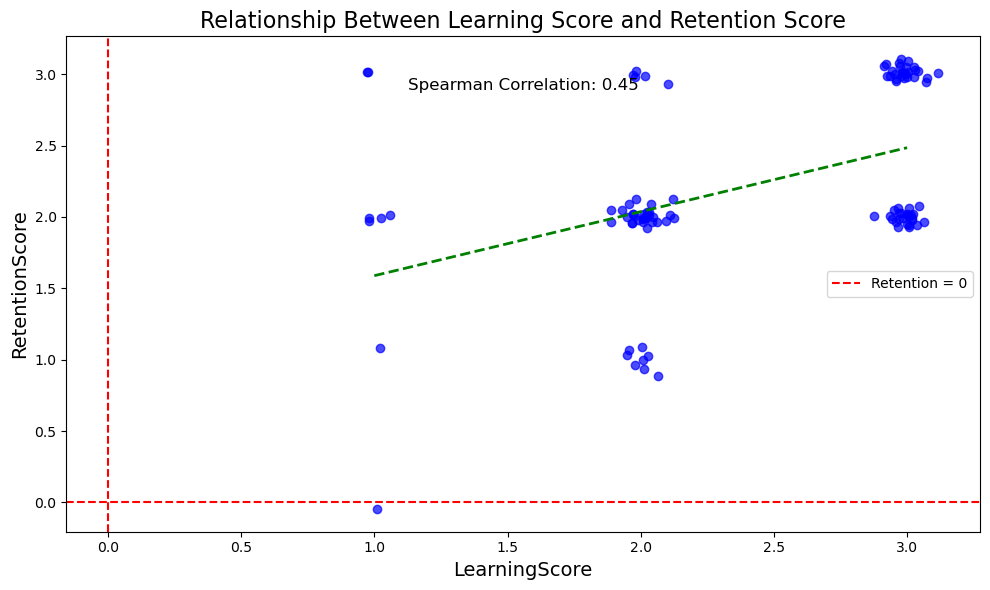

In [65]:
# Adding jitter (random noise) to avoid complete overlap of identical points
jitter_strength = 0.05 

# Creating a scatter plot with all data points (no aggregation)
plt.figure(figsize=(10, 6))

# Adding jitter to the data to ensure even repeated points are visible
x_jitter = data['LearningScore'] + np.random.normal(0, jitter_strength, size=len(data))
y_jitter = data['RetentionScore'] + np.random.normal(0, jitter_strength, size=len(data))

# Basic scatter plot with jittered data
plt.scatter(x_jitter, y_jitter, color='blue', alpha=0.7)

# Adding a title
plt.title('Relationship Between Learning Score and Retention Score', fontsize=16)

# Adding axis labels
plt.xlabel('Learning Score', fontsize=14)
plt.ylabel('Retention Score', fontsize=14)

# Adding horizontal and vertical lines with annotations
plt.axhline(y=0, color='r', linestyle='--', label='Retention = 0')
plt.axvline(x=0, color='r', linestyle='--')
plt.legend()

# Adding trend line (for correlation) 
sns.regplot(x=data['LearningScore'], 
            y=data['RetentionScore'], 
            scatter=False, 
            color='green', 
            line_kws={"color": "green", "lw": 2, "ls": "--"}, 
            ci=None) 

# Displaying the Spearman correlation coefficient 
plt.text(0.5, 0.9, f'Spearman Correlation: 0.45', ha='center', va='center', fontsize=12, transform=plt.gca().transAxes)

# Removing extra white space
plt.tight_layout()

# Saving and displaying the plot
plt.savefig('learning_retention_correlation.png')  # Save the figure
plt.show()


In [66]:
contingency_table = pd.crosstab(data['How did competition with your peers affect your focus and effort?'],
                                data['Did the leaderboard feature motivate you to perform better?'])

In [67]:
# Performing Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

In [68]:
contingency_table

Did the leaderboard feature motivate you to perform better?,A little,Not really,"Yes, it motivated me a lot"
How did competition with your peers affect your focus and effort?,,,
Decreased my focus and effort,2,2,2
Had no effect,9,5,4
Increased my focus and effort,21,1,58


In [69]:
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 28.45104166666667
P-value: 1.0104316883378912e-05


In [72]:
# Creating a contingency table for Chi-Square Test
contingency_table = pd.crosstab(data['Which semester are you currently enrolled in?'], 
                                 data['Would you prefer more gamified activities in your future lessons?'])

# Performing Chi-Square Test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")


Chi-Square Test Results:
Chi-Square Statistic: 4.562294616331198
P-value: 0.6010443096016993


In [75]:
contingency_table

Would you prefer more gamified activities in your future lessons?,Maybe,No,"Yes, definitely"
Which semester are you currently enrolled in?,,,
BS Semester 3,13,0,30
BS Semester 5,11,0,27
MS Semester 1,7,1,13
MS Semester 1,1,0,1


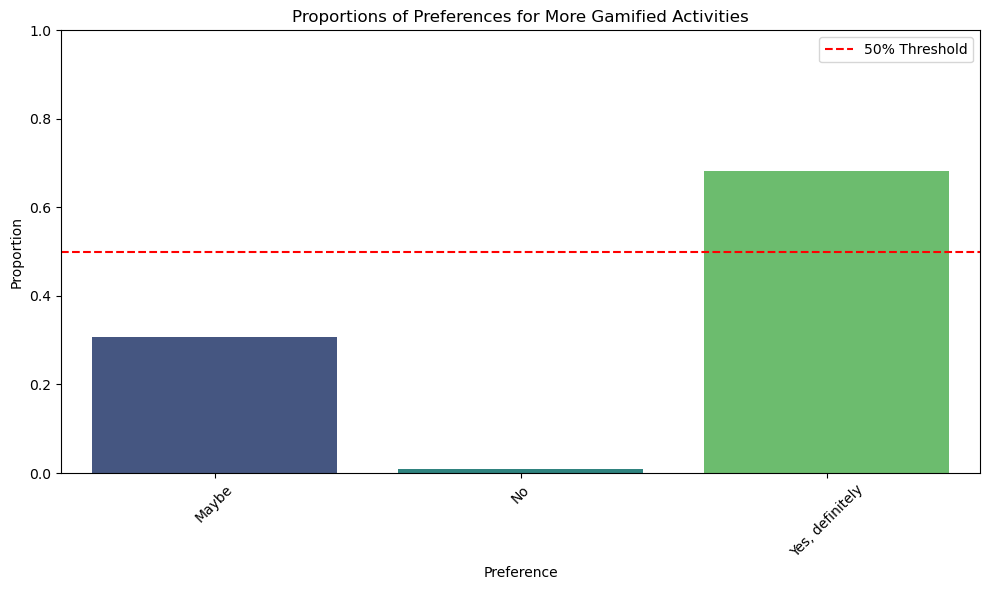

In [74]:
preferences = contingency_table.sum(axis=0)
preferences_proportions = preferences / preferences.sum()

#  Chi-Square Test Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=preferences_proportions.index, y=preferences_proportions.values, palette='viridis')
plt.title('Proportions of Preferences for More Gamified Activities')
plt.xlabel('Preference')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--', label='50% Threshold')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('chi_square_preferences.png')  # Save the figure
plt.show()
